In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

node1 = tf.constant(3.0, dtype = tf.float32)
node2 = tf.constant(4.0)
print(node1, node2)

Tensor("Const_6:0", shape=(), dtype=float32) Tensor("Const_7:0", shape=(), dtype=float32)


In [5]:
sess = tf.Session()
print(sess.run([node1, node2]))

[3.0, 4.0]


In [6]:
from __future__ import print_function
node3 = tf.add(node1, node2)
print("node3:", node3)
print("sess.run(node3):", sess.run(node3))

node3: Tensor("Add:0", shape=(), dtype=float32)
sess.run(node3): 7.0


In [7]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b  # + provides a shortcut for tf.add(a, b)

In [8]:
print(sess.run(adder_node, {a: 3, b: 4.5}))
print(sess.run(adder_node, {a: [1, 3], b: [2, 4]}))


7.5
[ 3.  7.]


In [9]:
add_and_triple = adder_node * 3.
print(sess.run(add_and_triple, {a: 3, b: 4.5}))

22.5


In [10]:
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W*x + b

In [11]:
init = tf.global_variables_initializer()
sess.run(init)

In [12]:
print(sess.run(linear_model, {x: [1, 2, 3, 4]}))


[ 0.          0.30000001  0.60000002  0.90000004]


In [13]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)
print(sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))

23.66


In [14]:
fixW = tf.assign(W, [-1.])
fixb = tf.assign(b, [1.])
sess.run([fixW, fixb])
print(sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))

0.0


In [15]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

sess.run(init) # reset values to incorrect defaults.
for i in range(1000):
  sess.run(train, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]})

print(sess.run([W, b]))

[array([-0.9999969], dtype=float32), array([ 0.99999082], dtype=float32)]


Okay, let us test an arbitrary linear regression model in two variables. First we generate data

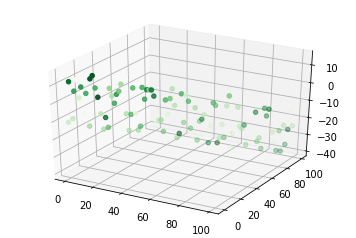

In [33]:
x1 = np.arange(100)
x2 = np.arange(100)
delta = np.random.uniform(-15, 15, size = (100,))
y = 0.2*x1 - 0.5*x2 + 2.4 + delta

data = np.column_stack([x1, x2, y])

ax = plt.axes(projection='3d')

ax.scatter3D(x1, x2, y, c=zdata, cmap='Greens');
plt.show()

In [48]:
x_values = data[:, :-1]

y_values = data[:, -1]

sess = tf.Session()
W = tf.Variable(np.ones(x_values.shape[-1]))
b = tf.Variable([1])
x = tf.placeholder(tf.float32)
model = W*x + b
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(model- y)
loss= tf.reduce_sum(squared_deltas)
print(sess.run(loss, {x: x_values, y: y_values}))

ValueError: Tensor conversion requested dtype float64 for Tensor with dtype float32: 'Tensor("Placeholder_4:0", dtype=float32)'